### Data Profiling
We identified our dependent variable as "Stay" which is the number of days each patient stayed in the hospital. Some of the main independent variables are "Available Extra Rooms in Hospital", "Visitors with Patient", "Bed Grade", "Admission_Deposit", "Age", "Type of Admission", "Severity of Illness". After our investigation, we realized that most of the variables are categorical, so we generated only several numerical visualizations down below. We may focus on Classification more in our future analysis.

Some of the variables we considered to be numerical through our initial observation turns out to be categorical, such as “Ward_Facility_Code”, “Bed_Grade”, “City_Code_Patient.” Although they are all considered to be int in the data frame, due to its nature, we need to correct it with further classifications.

After summarize the data and visualize the data distribution for our dependent variable "Stay", we can tell that there is a peak in the 11-20 and 21-30 days range. Most of the people tend to stay about 20 days in the hospital.

Some questions arose during our investigation:
1. Some of the variables, such as “Age” and “Stay” are intrinsically numerical but are labeled as categorical. Would it be better to convert it back to numerical by taking the averages and reassigning the values?
2. If we decided not to convert our dependent variable “Stay” back to numerical, do you have any advice on the next steps (classification, logistic regression…)? 
3. Overall, do you think this dataset is usable? Is there anything else we need to consider?

In [8]:
import pandas
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
df = pandas.read_csv("train_data.csv")
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [10]:
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [11]:
df.describe().round(2)

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.00,318438.00,318438.00,318438.00,318325.00,318438.00,313906.00,318438.00,318438.00
mean,159219.50,18.32,4.77,3.20,2.63,65747.58,7.25,3.28,4880.75
std,91925.28,8.63,3.10,1.17,0.87,37979.94,4.75,1.76,1086.78
min,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1800.00
25%,79610.25,11.00,2.00,2.00,2.00,32847.00,4.00,2.00,4186.00
50%,159219.50,19.00,5.00,3.00,3.00,65724.50,8.00,3.00,4741.00
75%,238828.75,26.00,7.00,4.00,3.00,98470.00,8.00,4.00,5409.00
max,318438.00,32.00,13.00,24.00,4.00,131624.00,38.00,32.00,11008.00


In [12]:
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [13]:
df.columns = df.columns.str.replace(' ', '_')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [15]:
df = df.dropna(subset=['Bed_Grade'])

In [16]:
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                               0
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [17]:
df.loc[np.isnan(df["City_Code_Patient"]), 'City_Code_Patient'] = -1

In [18]:
df['City_Code_Patient'].value_counts()

 8.0     123977
 2.0      38835
 1.0      26357
 7.0      23797
 5.0      20079
 4.0      15379
 9.0      11794
 15.0      8943
 10.0      8172
 6.0       6005
 12.0      5646
-1.0       4532
 3.0       3772
 23.0      3697
 14.0      2927
 16.0      2252
 13.0      1625
 21.0      1602
 20.0      1409
 18.0      1404
 19.0      1028
 26.0      1023
 25.0       798
 27.0       771
 11.0       658
 28.0       521
 22.0       405
 24.0       360
 30.0       133
 29.0        98
 33.0        78
 31.0        59
 37.0        57
 32.0        52
 34.0        46
 35.0        16
 36.0        12
 38.0         6
Name: City_Code_Patient, dtype: int64

In [19]:
df.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [20]:
df.corr()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
case_id,1.000000,-0.043068,-0.011345,0.042605,0.013702,-0.004135,0.058189,0.001305,-0.045964
Hospital_code,-0.043068,1.000000,0.128533,-0.059519,-0.013739,0.002270,-0.014636,-0.028553,0.045322
City_Code_Hospital,-0.011345,0.128533,1.000000,-0.045817,-0.049309,0.000759,-0.019541,0.018199,-0.034419
Available_Extra_Rooms_in_Hospital,0.042605,-0.059519,-0.045817,1.000000,-0.115868,0.000945,-0.010957,0.096755,-0.143722
Bed_Grade,0.013702,-0.013739,-0.049309,-0.115868,1.000000,0.001645,-0.013403,0.088945,0.073833
patientid,-0.004135,0.002270,0.000759,0.000945,0.001645,1.000000,0.001734,0.006831,-0.000885
City_Code_Patient,0.058189,-0.014636,-0.019541,-0.010957,-0.013403,0.001734,1.000000,-0.014912,0.026681
Visitors_with_Patient,0.001305,-0.028553,0.018199,0.096755,0.088945,0.006831,-0.014912,1.000000,-0.150363
Admission_Deposit,-0.045964,0.045322,-0.034419,-0.143722,0.073833,-0.000885,0.026681,-0.150363,1.000000


After our investigation, we realized that most of the variables are categorical variables. 

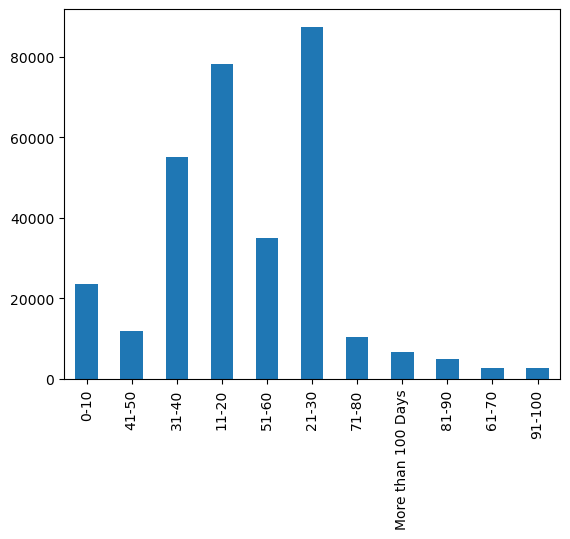

In [21]:
# Dependent Variable - Length of Stay
stay = df['Stay'].value_counts(sort=False).plot.bar()

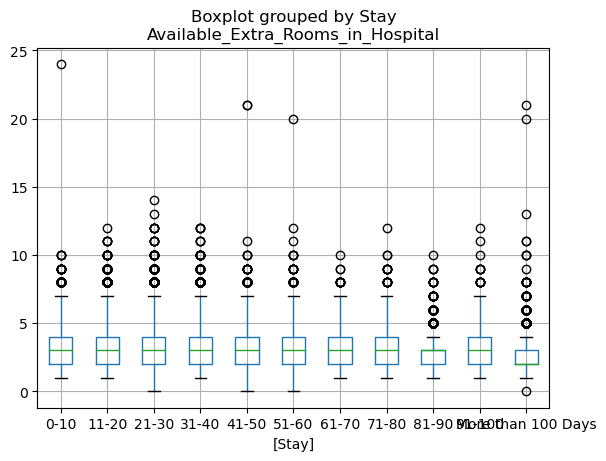

In [22]:
# Bar chart to visualize the relationship between variables
box = df.boxplot(column=['Available_Extra_Rooms_in_Hospital' ], by = [ 'Stay' ])

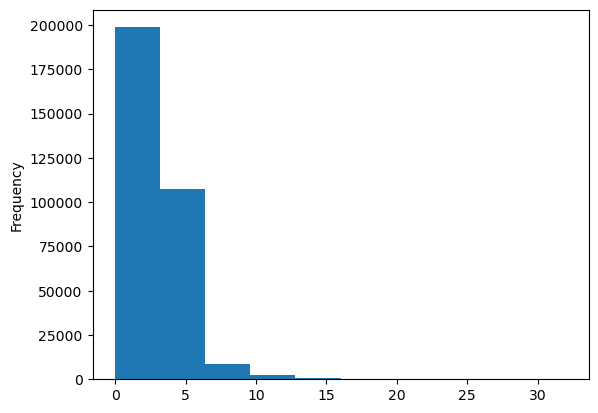

In [23]:
hist = df['Visitors_with_Patient'].plot.hist()

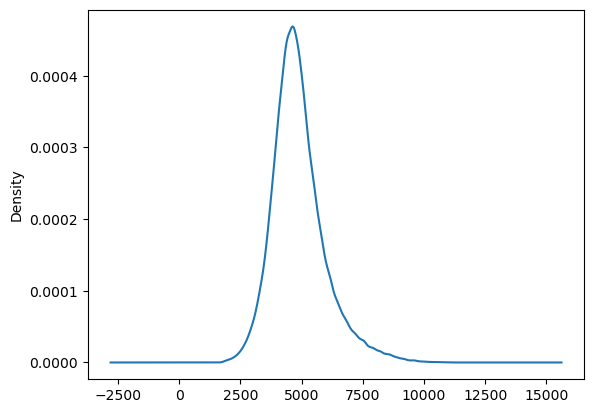

In [24]:
density = df['Admission_Deposit'].plot.density(bw_method=None, ind=None)

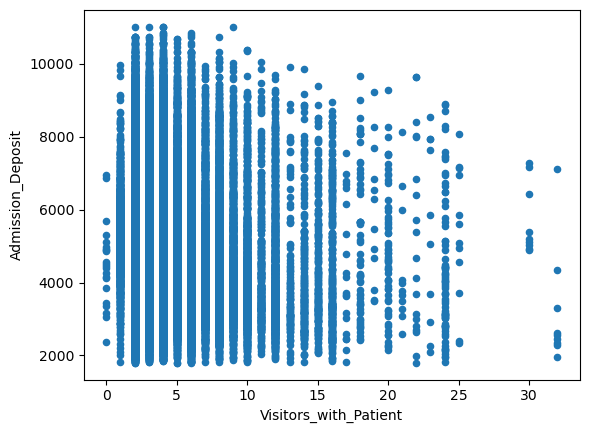

In [25]:
scatter = df.plot.scatter(x="Visitors_with_Patient", y="Admission_Deposit")

In [26]:
df['Severity_of_Illness'].value_counts(normalize = True)

Moderate    0.552244
Minor       0.269693
Extreme     0.178063
Name: Severity_of_Illness, dtype: float64

In [27]:
df['Department'].value_counts(normalize = True)

gynecology            0.783435
anesthesia            0.093134
radiotherapy          0.089550
TB & Chest disease    0.030108
surgery               0.003773
Name: Department, dtype: float64

## Pre-Modeling: Imputing and Feature Engineering

First, we will transform categorical variable 'Age' to numerical variable

In [28]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [29]:
df['Age'].value_counts()

41-50     63716
31-40     63613
51-60     48497
21-30     40828
71-80     35784
61-70     33681
11-20     16763
81-90      7887
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [30]:
df.loc[df['Age'] == "0-10", "Age"] = 5
df.loc[df['Age'] == "11-20", "Age"] = 15
df.loc[df['Age'] == "21-30", "Age"] = 25
df.loc[df['Age'] == "31-40", "Age"] = 35
df.loc[df['Age'] == "41-50", "Age"] = 45
df.loc[df['Age'] == "51-60", "Age"] = 55
df.loc[df['Age'] == "61-70", "Age"] = 65
df.loc[df['Age'] == "71-80", "Age"] = 75
df.loc[df['Age'] == "81-90", "Age"] = 85
df.loc[df['Age'] == "91-100", "Age"] = 95
df.loc[:,'Age'] = df['Age'].astype(int)

/var/folders/v9/7mxl6wx52jx4skxtg5zxmbj00000gn/T/ipykernel_33389/2533144532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Age'] = df['Age'].astype(int)


In [31]:
df['Age'].value_counts()

45    63716
35    63613
55    48497
25    40828
75    35784
65    33681
15    16763
85     7887
5      6254
95     1302
Name: Age, dtype: int64

In [32]:
df['Stay_cat']=df['Stay']

/var/folders/v9/7mxl6wx52jx4skxtg5zxmbj00000gn/T/ipykernel_33389/2077563051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stay_cat']=df['Stay']


In [33]:
df.loc[df['Stay'] == "0-10", "Stay"] = 5
df.loc[df['Stay'] == "11-20", "Stay"] = 15
df.loc[df['Stay'] == "21-30", "Stay"] = 25
df.loc[df['Stay'] == "31-40", "Stay"] = 35
df.loc[df['Stay'] == "41-50", "Stay"] = 45
df.loc[df['Stay'] == "51-60", "Stay"] = 55
df.loc[df['Stay'] == "61-70", "Stay"] = 65
df.loc[df['Stay'] == "71-80", "Stay"] = 75
df.loc[df['Stay'] == "81-90", "Stay"] = 85
df.loc[df['Stay'] == "91-100", "Stay"] = 95
# df.loc[df['Stay'] == "More than 100 Days", "Stay"] = 
# need to make reasonable assumption for More than 100 Days

In [34]:
df.Stay

0          5
1         45
2         35
3         45
4         45
          ..
318433    15
318434    35
318435    15
318436    15
318437     5
Name: Stay, Length: 318325, dtype: object

In [35]:
# through research, we decided to make assumptions based on department data:
    # It's major focus in on gynecology
df['Department'].value_counts()

gynecology            249387
anesthesia             29647
radiotherapy           28506
TB & Chest disease      9584
surgery                 1201
Name: Department, dtype: int64

In [36]:
# Since we are making assumptions for "More than 100 Days", we decided to look into 
# the 6,683 data points and see how were the Departments distributed
df_see = df[df['Stay'] == 'More than 100 Days']
df_see['Department'].value_counts()
# since most of these patients who stayed over 100 days were admitted to the gynecology department,
# we will make the assumptions based on gynecology inpatient LOS (Length of Stay) data

gynecology            4961
radiotherapy           945
anesthesia             605
TB & Chest disease     124
surgery                 46
Name: Department, dtype: int64

In [37]:
df.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
Stay_cat                             0
dtype: int64

### Analysis of length of hospital stay using electronic health records: A statistical and data mining approach
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5898738/
- Summary for length of stay of the hospitalized patients.
    - Metric	Value
    - Average	7.0
    - Median	4.0
    - Interquartile Range (i.e., IQR)	2.0–8.0
    - Minimum	0 (i.e., Patients were discharged on the same day)
    - **Maximum	243.0**
- **we will take the mid-point of 100 to 243 days as our 'More than 100 days'number: 175**

In [38]:
import statistics
mid_over100_stay = round(statistics.median([100,243]))
mid_over100_stay

172

In [39]:
df.loc[df['Stay'] == "More than 100 Days", "Stay"] = mid_over100_stay

In [40]:
df['Stay'].value_counts()

25     87454
15     78120
35     55137
55     35005
5      23602
45     11735
75     10250
172     6681
85      4837
95      2764
65      2740
Name: Stay, dtype: int64

In [41]:
df['Stay']

0          5
1         45
2         35
3         45
4         45
          ..
318433    15
318434    35
318435    15
318436    15
318437     5
Name: Stay, Length: 318325, dtype: object

# Model Construction - When 'Stay' is numerical
- Use df.Stay as the dependent variable
- models choosed:
    - linear regression 
    - neural network

### Splitting & Pipeline

In [42]:
from sklearn.model_selection import train_test_split
rng = np.random.RandomState( 50 )
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(df, df.Stay, random_state=rng, test_size=0.33 )
y_train_num = y_train_num.astype('int')
y_test_num = y_test_num.astype('int')

In [43]:
y_train_num

242725    55
30602     15
3799      35
139952    15
220978    35
          ..
186531    15
317623    55
153768    25
239612    25
103932    35
Name: Stay, Length: 213277, dtype: int64

In [44]:
#"Available Extra Rooms in Hospital", "Visitors with Patient", "Bed Grade", "Admission_Deposit", "Age", "Type of Admission", "Severity of Illness"
lstNum = [ 'Age','Available_Extra_Rooms_in_Hospital' ,'Visitors_with_Patient','Admission_Deposit']
lstCat = [ 'Department','Bed_Grade','Type_of_Admission','Severity_of_Illness']

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

pipeNum = Pipeline( [
("selector", ColumnTransformer([ ("selector", "passthrough", lstNum ) ] )),
('scaler', StandardScaler() ),
])

pipeCat = Pipeline([
('selector', ColumnTransformer([ ("selector", "passthrough", lstCat ) ] )),
('encoder', OneHotEncoder( dtype=int, drop="first" ) )
])

from sklearn.pipeline import FeatureUnion
preprocessor = FeatureUnion([
('cat', pipeCat ),
('num', pipeNum )
])


### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics
pipelinear = Pipeline([
('preprocessor', preprocessor ),
('model', LinearRegression() )
], verbose=True )

pipelinear.fit( X_train_num, y_train_num )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Department',
                                                                                                    'Bed_Grade',
                                                                                                    'Type_of_Admission',
                                                                                                    'Severity_of_Illness'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Age',
                                                                                                    'Available_Extra_Rooms_in_Hospital',
                                                                                                    'Visitors_with_Patient',
                                                                                                    'Admission_Deposit'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', LinearRegression())],
         verbose=True)

In [47]:
predTrain = pipelinear.predict( X_train_num )
sklearn.metrics.r2_score( y_train_num, predTrain )
predTest = pipelinear.predict( X_test_num )
sklearn.metrics.r2_score( y_test_num, predTest )

0.3518065313518911

0.35299899051987416

In [48]:
# We tried different combinations of variables here, but the results were almost the same or worse.
lstNum2 = [ 'Age','Available_Extra_Rooms_in_Hospital' ,'Visitors_with_Patient']
lstCat2 = [ 'Type_of_Admission']

pipeNum2 = Pipeline( [
("selector", ColumnTransformer([ ("selector", "passthrough", lstNum2 ) ] )),
('scaler', StandardScaler() )
])

pipeCat2 = Pipeline([
('selector', ColumnTransformer([ ("selector", "passthrough", lstCat2 ) ] )),
('encoder', OneHotEncoder( dtype=int, drop="first" ) )
])

preprocessor2 = FeatureUnion([
('cat', pipeCat2 ),
('num', pipeNum2 )
])

pipelinear2 = Pipeline([
('preprocessor', preprocessor2 ),
('model', LinearRegression() )
], verbose=True )

pipelinear2.fit( X_train_num, y_train_num )

predTrain2 = pipelinear2.predict( X_train_num )
sklearn.metrics.r2_score( y_train_num, predTrain2 )
predTest2 = pipelinear2.predict( X_test_num )
sklearn.metrics.r2_score( y_test_num, predTest2 )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Type_of_Admission'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Age',
                                                                                                    'Available_Extra_Rooms_in_Hospital',
                                                                                                    'Visitors_with_Patient'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', LinearRegression())],
         verbose=True)

0.3427279963644497

0.3435474883100704

### Neural Network

In [49]:
from sklearn.neural_network import MLPRegressor
pipeNn = Pipeline([
('preprocessor', preprocessor ),
('model', MLPRegressor( hidden_layer_sizes=(100,100,100), random_state=28 ) )], verbose=True )
pipeNn.fit( X_train_num, y_train_num )
predTrainNn = pipeNn.predict( X_train_num )
predTestNn = pipeNn.predict( X_test_num )
sklearn.metrics.cohen_kappa_score( y_train_num, predTrainNn )
sklearn.metrics.cohen_kappa_score( y_test_num, predTestNn )
sklearn.metrics.accuracy_score( y_train_num, predTrainNn )
sklearn.metrics.accuracy_score( y_train_num, predTestNn )


# It took a long time to run but the result was 0.24 for train data and 0.19 for test data

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing model, total=  14.9s


/Users/valeriechan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Department',
                                                                                                    'Bed_Grade',
                                                                                                    'Type_of_Admission',
                                                                                                    'Severity_of_Illness'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Age',
                                                                                                    'Available_Extra_Rooms_in_Hospital',
                                                                                                    'Visitors_with_Patient',
                                                                                                    'Admission_Deposit'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model',
                 MLPRegressor(hidden_layer_sizes=(100, 100, 100),
                              random_state=28))],
         verbose=True)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# Model Construction - When 'Stay' is categorical
- use df.Stay_cat as the dependent variable
- models choosed:
    - classification 
    - logistic 
    - neural network 
    - random trees

## Splitting

In [50]:
# Splitting test, train
from sklearn.model_selection import train_test_split
rng = np.random.RandomState( 50 )
X_train, X_test, y_train, y_test = train_test_split(df, df.Stay_cat, random_state=rng, test_size=0.33 )

In [51]:
y_test

225909    11-20
125438    31-40
247097    21-30
158679    31-40
59568     21-30
          ...  
49042     21-30
25267     41-50
33799     11-20
218200     0-10
176240    51-60
Name: Stay_cat, Length: 105048, dtype: object

## Neural Network
- Thought about setting several different tuning layers to try, but due to the dataframe size, this might run a long time.
- Will try it when I installed Jupyter Lab on my PC.

In [ ]:
from sklearn.neural_network import MLPClassifier

pipeCat_Nn = Pipeline([('preprocessor', preprocessor ),
                      ('model', MLPClassifier( hidden_layer_sizes=(84,134,289), random_state=50 ) )], verbose=True )

pipeCat_Nn.fit( X_train, y_train )

# it kind of took an eternity to run this...
# We probably will need to reduce the datapoints...

In [ ]:
predTrainCatNn = pipeCat_Nn.predict( X_train )
predTestCatNn = pipeCat_Nn.predict( X_test )

sklearn.metrics.cohen_kappa_score( y_train, predTrainCatNn )
sklearn.metrics.cohen_kappa_score( y_test, predTestCatNn )
sklearn.metrics.accuracy_score( y_train, predTrainCatNn )
sklearn.metrics.accuracy_score( y_test, predTestCatNn )
print( sklearn.metrics.classification_report( y_train, predTrainCatNn ) )
print( sklearn.metrics.classification_report( y_test, predTestCatNn ) )
#results:
#0.2682511207085778
#0.17924285287549901
#0.42620160636167986
#0.3572366917980352

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeRf = Pipeline([('preprocessor', preprocessor ),
                   ('model', RandomForestClassifier() )], verbose=True )

pipeRf.fit( X_train, y_train )
predTrainRf = pipeRf.predict( X_train )
predTestRf = pipeRf.predict( X_test )

sklearn.metrics.cohen_kappa_score( y_train, predTrainRf )
sklearn.metrics.cohen_kappa_score( y_test, predTestRf )
sklearn.metrics.accuracy_score( y_train, predTrainRf )
sklearn.metrics.accuracy_score( y_test, predTestRf )
print( sklearn.metrics.classification_report( y_train, predTrainRf ) )
print( sklearn.metrics.classification_report( y_test, predTestRf ) )

In [ ]:
# ^^oh no... Severe Overfitting
rfBar = pandas.Series( pipeRf[ "model" ].feature_importances_,
                      index=pipeRf[:-1]. get_feature_names_out() ).plot.barh()

## XGBoost

In [ ]:
import xgboost # you will get the warning but it works.. so ignore lol
from xgboost import XGBClassifier
pipeXgbA = Pipeline([('preprocessor', preprocessor ),
                     ('model', XGBClassifier( use_label_encoder=False ) )], verbose=True )
# what does this error message mean?

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trainEnc = le.fit_transform( y_train )
y_testEnc = le.fit_transform( y_test )

pipeXgbA.fit( X_train, y_trainEnc )
predTrainXgbA = pipeXgbA.predict( X_train )
predTestXgbA = pipeXgbA.predict( X_test )



In [ ]:
# training

sklearn.metrics.cohen_kappa_score( y_trainEnc, predTrainXgbA )
sklearn.metrics.cohen_kappa_score( y_testEnc, predTestXgbA )

sklearn.metrics.accuracy_score( y_trainEnc, predTrainXgbA )
sklearn.metrics.accuracy_score( y_testEnc, predTestXgbA )
print( sklearn.metrics.classification_report( y_trainEnc, predTrainXgbA ) )
print( sklearn.metrics.classification_report( y_testEnc, predTestXgbA ) )

In [ ]:
# tried tuning and search for best param
# something traumatic happened to that file
# cannot safe anymore

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from mlxtend.preprocessing import DenseTransformer
from sklearn import linear_model
import sklearn.metrics

pipeLogistic = Pipeline([
('preprocessor', preprocessor ),
('todense', DenseTransformer() ),
('model', LogisticRegression( max_iter = 200 ) )
], verbose=True )
pipeLogistic.fit( X_train, y_train)
predTrainLogistic = pipeLogistic.predict( X_train )
predTestLogistic = pipeLogistic.predict( X_test )

print(sklearn.metrics.classification_report( y_train, predTrainLogistic ) )
sklearn.metrics.cohen_kappa_score( y_train, predTrainLogistic )
sklearn.metrics.cohen_kappa_score( y_test, predTestLogistic )

[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   0.4s
[Pipeline] ........... (step 2 of 3) Processing todense, total=   0.0s


KeyboardInterrupt: 